# LetsGrowMore

# LGMVIP- March 2022

## Internship Domain: Data Science

## Task 1: Iris Flowers Classification ML Project 

# Importing Libraries

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
df=pd.read_csv('Iris.csv') 

In [3]:
df.head() # to show top 5 records

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


The dataset contains a set of 150 records under 5 attributes - Petal Length, Petal Width, Sepal Length, Sepal width and Class(Species)

In [4]:
df.info() # to display basic information 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df = df.drop(['Id'],axis=1) # dropping the Id column as it is unecessary

In [6]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.shape # (rows, columns)

(150, 5)

In [8]:
df['Species'].value_counts() # to display count of each species

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [9]:
df.isnull().sum() # No null values

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Exploratory Data Analysis

In [10]:
df.corr() # checking the correlation

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


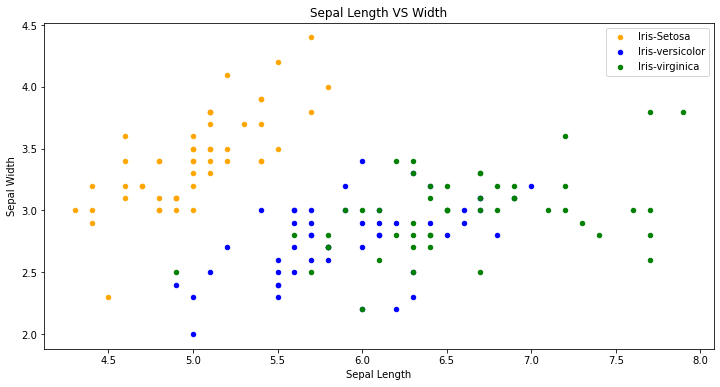

In [11]:
fig = df[df.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Iris-Setosa')
df[df.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='Iris-versicolor',ax=fig)
df[df.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='Iris-virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(12,6)

# It shows relationship between the sepal length and width

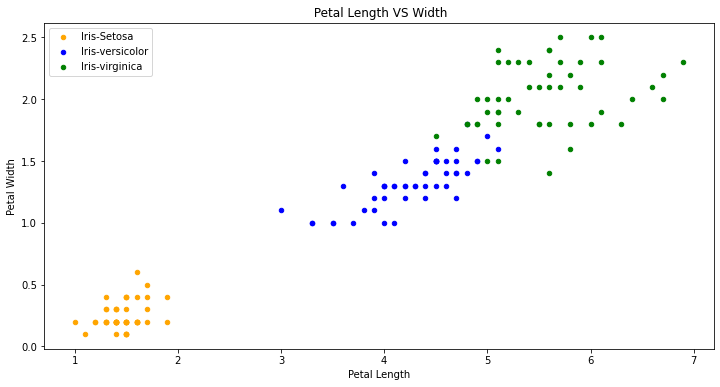

In [12]:
fig = df[df.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Iris-Setosa')
df[df.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='Iris-versicolor',ax=fig)
df[df.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='Iris-virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(12,6)

# It shows relationship between the petal length and width

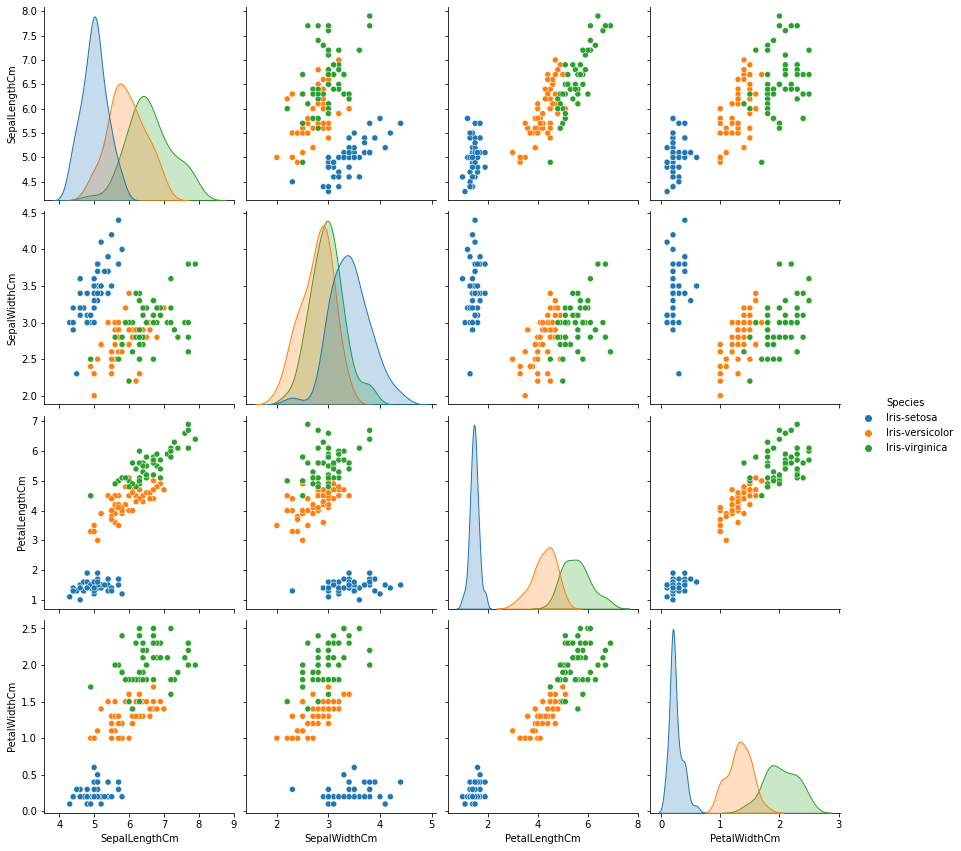

In [13]:
sns.pairplot(df, hue="Species", size=3)

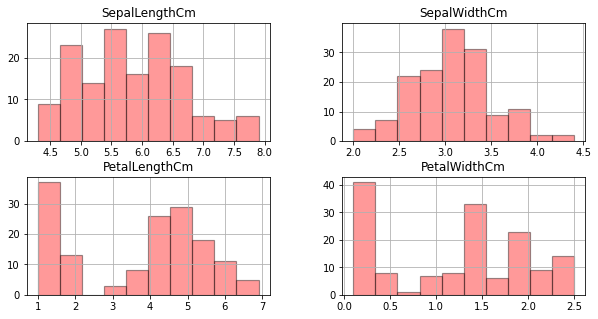

In [14]:
df.hist(color='red', edgecolor='black', linewidth=1.2, alpha=0.4)
fig=plt.gcf()
fig.set_size_inches(10,5)

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

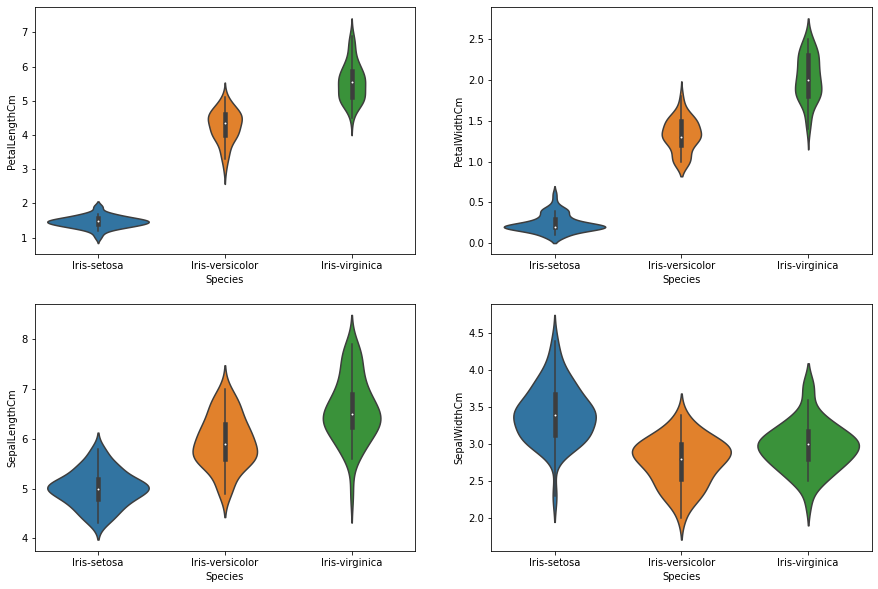

In [15]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=df)

The violinplot shows density of the length and width in the species. The thinner part denotes that there is less density whereas the fatter part conveys higher density

### The problem is a classification problem thus we will be using the classification algorithms to build a model.

### Features
- SepalLengthCm 	
- SepalWidthCm 	
- PetalLengthCm 	
- PetalWidthCm

### Target Variable

- Species

In [16]:
# importing all necessary packages to use various classififcation algorithms
from sklearn.model_selection import train_test_split # to split the dataset for training and testing
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn import svm  # for Support Vector Machine (SVM) Algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics #for checking the model accuracy


In [17]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df["Species"]=label.fit_transform(df["Species"])

<AxesSubplot:>

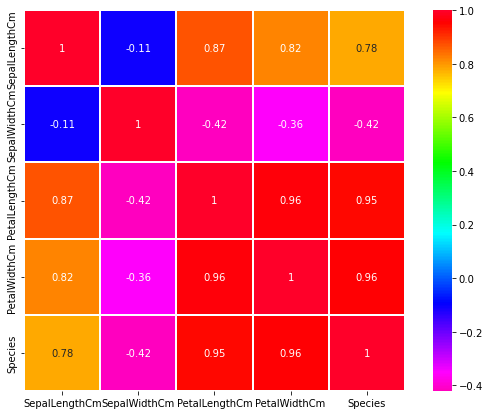

In [18]:
plt.figure(figsize=(10,7)) 
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, square=True, cmap='gist_rainbow_r', linecolor='white',annot=True) 
#draws  heatmap with input as the correlation matrix calculted by(df.corr())

The Sepal Width and Length are not correlated The Petal Width and Length are highly correlated

We will use all the features for training the algorithm and check the accuracy.

In [19]:
df_train, df_test = train_test_split(df, test_size = 0.3, random_state=1) 
# splits the data into 70% and 30% ratio. train=70% and test=30%b

In [20]:
print(df_train.shape, df_test.shape) 

(105, 5) (45, 5)


In [21]:
train_X = df_train.drop(['Species'], axis=1)# taking the training data features
train_y=pd.DataFrame(df_train['Species']) # output of our training data
test_X= df_test.drop(['Species'], axis=1) # taking test data features
test_y =pd.DataFrame(df_test['Species'])

In [22]:
print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

(105, 4) (45, 4) (105, 1) (45, 1)


In [23]:
train_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
118,7.7,2.6,6.9,2.3
18,5.7,3.8,1.7,0.3
4,5.0,3.6,1.4,0.2
45,4.8,3.0,1.4,0.3
59,5.2,2.7,3.9,1.4


In [24]:
test_y

,Species
14,0
98,1
75,1
16,0
131,2
56,1
141,2
44,0
29,0
120,2


# Logistic Regression

In [25]:
model = LogisticRegression()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('Logistic Regression :',metrics.accuracy_score(prediction,test_y))

Logistic Regression : 0.9777777777777777


# K-nearest neighbors

In [26]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(train_X, train_y)
prdeiction=model.predict(test_X)
print('K-nearest neighbors :',metrics.accuracy_score(prediction,test_y))

K-nearest neighbors : 0.9777777777777777


# Support Vector Machine


In [27]:
model = svm.SVC() #select the algorithm
model.fit(train_X,train_y) # we train the algorithm with the training data and the training output
prediction=model.predict(test_X) #now we pass the testing data to the trained algorithm
print('SVM :',metrics.accuracy_score(prediction,test_y))

SVM : 0.9777777777777777


In [28]:
from sklearn.metrics import classification_report,confusion_matrix

In [29]:
print(confusion_matrix(test_y,prediction))

[[14  0  0]
 [ 0 17  1]
 [ 0  0 13]]


In [30]:
print(classification_report(test_y,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        18
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [31]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [32]:
r2_score(test_y, prediction)

0.9629324546952224

In [33]:
mean_squared_error(test_y, prediction)

0.022222222222222223

### Logistic Regression, Support Vector Machine and K-nearest neighbors algorithms showed similar accuracy score.

## Thank You